# Superconductors Critical Temperature
&nbsp;&nbsp;**DS 7330**
- Yucheol Shin
- Ricco Ferraro

# Goal <a id='business-understanding'/>

Superconductors are vital to a variety of applications due to their special electrical and electromagnetic properties. The goal of this research is to build a predictive model to help scientists both if a new material will meet the criteria of a superconductor and understand what factors allow correlate or predict critical temperatures.  

# Data <a id='data-evaluation'/>

The dataset used in this study is composed of two smaller datasets. The first "material" dataset includes an elemental breakdown of a material such as hydrogen, iron, gold, etc. The second "feature" dataset consists of the features of each material, such as the number of elements and atomic mass. After combing the two datasets based on the index, the full dataset consisted of 21,263 observations and 168 variables including the target variable of critical temperature. The distribution of the critical temperature is right skewed which is to expected with temperature measurements. Data transform was attempted on the dataset however, this didn't appear to improve the data distribution significantly so the standard critical temperature is used.

The full dataset does not have any missing values, however it is important to know that many of the values for the elements contain 0's as the materials will not have all or most of the elements within them.

All the variables will be used for model building, expect for the material name. The material name is a unique identifier for a particular material, thus not making it appropriate for model building.

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_material = pd.read_csv('./superconduct/unique_m.csv')
df_feature = pd.read_csv('./superconduct/train.csv')

In [3]:
df_material = df_material.drop(columns=['material'])
df_material.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0


Below we can see the first 5 entries of the "feature" dataset which lists additional features of each material like geometric mean atomic mass and entropy based atomic mass. 

In [4]:
df_feature.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [5]:
df_material_cols = df_material.columns.values.tolist()
df_feature_cols = df_feature.columns.values.tolist()
col_list = df_material_cols[0:-1] + df_feature_cols

In [6]:
full = pd.concat([df_material.iloc[:,0:-1], df_feature], axis=1, ignore_index=True)
full.columns = col_list

Below you can see the concatenated "full" dataset which joins, on each molecule, the two datasets mentioned above. Note: we are assuming that the individual "material" and "feature" datasets are ordered EXACTLY the same. There doesn't appear to be a unique identifier to join on, so this assumption must be made. 

In [7]:
full.head(10)

,H,He,Li,Be,B,C,N,O,F,Ne,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0
5,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0
6,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.0
7,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.0
8,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.0
9,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.0


In [8]:
full.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,0.017685,0.0,0.012125,0.034638,0.142594,0.384968,0.013284,3.009129,0.014874,0.0,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,0.267220,0.0,0.129552,0.848541,1.044486,4.408032,0.150427,3.811649,0.132119,0.0,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,14.000000,0.0,3.000000,40.000000,105.000000,120.000000,12.800000,66.000000,4.000000,0.0,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


Note: All types in our dataset can be represented as integers or floats.

In [9]:
print(set(full.dtypes))

{dtype('float64'), dtype('int64')}


Below we can see that there are NO missing values in our "full" dataset

In [10]:
print(f"Missing Values found in dataset: {full.isnull().values.any()}")

Missing Values found in dataset: False


One thing we can see right away is that properties like element counts are sparse in nature. For the time being, however, we will keep all features in our dataset, and let analysis performed in Model Preperation and EDA decide feature importance and which features to include in a final model. 

### Test-Train split
Below you can see that we hold out a test set of 30% of our data. This will be used later for model evaulation. 

In [36]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(full, test_size=0.3)

## EDA

### EDA: material data <a id='eda-material-data'/>

##### Elemental Distribution 

The material Data set has sparcity in that lots of entries are filled with zero values. This might indicate some information but it may impact the prediction in that it can cause difficulties when generalizing prediction results as well as in cross validation.

As the below histograms show, there are high number of zero entries. Even for materials that are used in highly variable combinations (many levels), the zeros still dominate. 

Further, because the element counts can only be positive, as expected, the distributions are right skewed, but the primary concern is the number of missing values.

Due to this data sparsity, elements with many unique values are aggregated into a single more dense the material feature called "other materials".

/var/folders/k0/7s390zms0yl52_w0jm6bkb7h0000gn/T/ipykernel_13678/2854511243.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_material[row_unique_cols].hist(ax = ax)


array([[<AxesSubplot:title={'center':'O'}>,
        <AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'V'}>],
       [<AxesSubplot:title={'center':'Fe'}>,
        <AxesSubplot:title={'center':'Cu'}>,
        <AxesSubplot:title={'center':'Sr'}>],
       [<AxesSubplot:title={'center':'Nb'}>,
        <AxesSubplot:title={'center':'Ba'}>,
        <AxesSubplot:title={'center':'La'}>],
       [<AxesSubplot:title={'center':'critical_temp'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

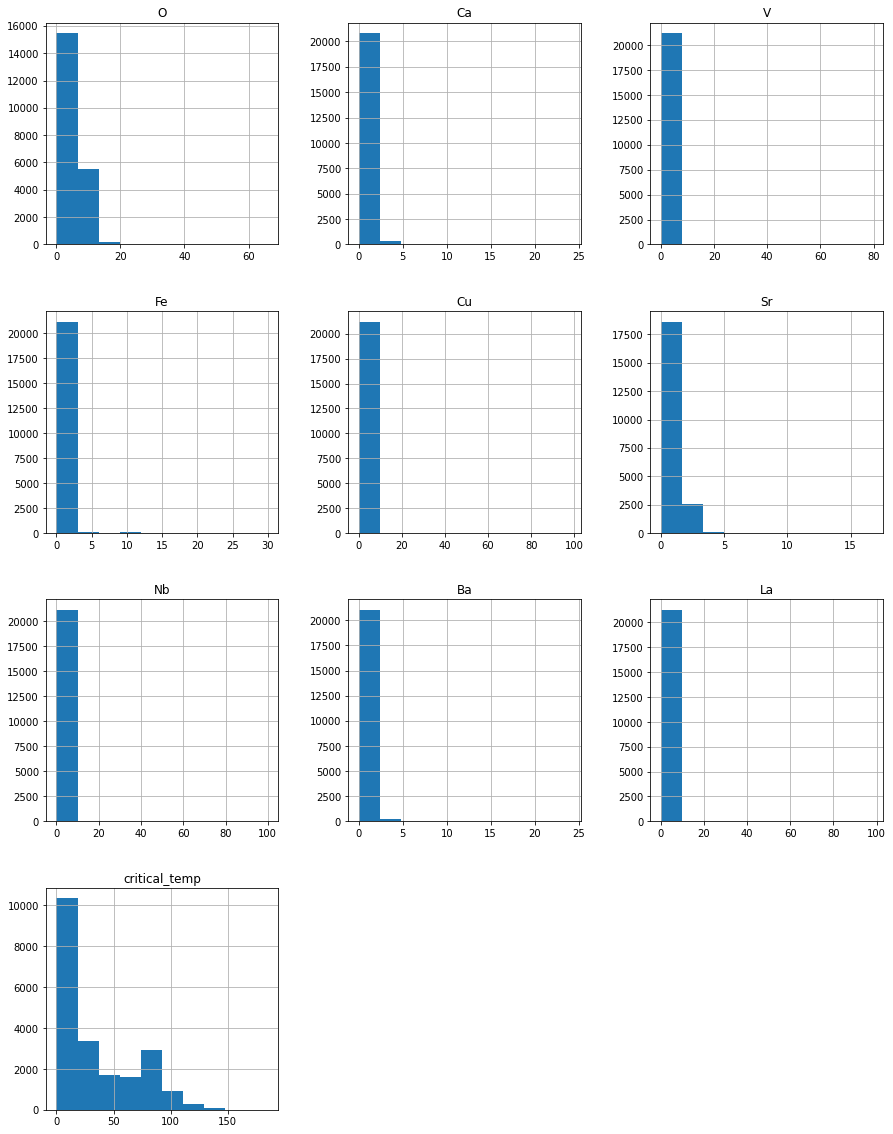

In [12]:
high_number_of_levels = 213
row_unique_cols = df_material.columns[df_material.nunique() > high_number_of_levels]

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_material[row_unique_cols].hist(ax = ax)

As can be seen, the aggregated field 'Other_Materials' is added to both our test and training datasets. 

In [37]:
train['Other_Materials'] = df_material[df_material.columns.difference(['O','Cu','Ba', 'Ca', 'material', 'critical_temp'])].sum(axis=1)
test['Other_Materials'] = df_material[df_material.columns.difference(['O','Cu','Ba', 'Ca', 'material', 'critical_temp'])].sum(axis=1)


/var/folders/k0/7s390zms0yl52_w0jm6bkb7h0000gn/T/ipykernel_13678/1710401347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Other_Materials'] = df_material[df_material.columns.difference(['O','Cu','Ba', 'Ca', 'material', 'critical_temp'])].sum(axis=1)
/var/folders/k0/7s390zms0yl52_w0jm6bkb7h0000gn/T/ipykernel_13678/1710401347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Other_Materials'] = df_material[df_material.columns.difference(['O','Cu','Ba', 'Ca', 'material', 'critical_temp'])]

##### Feature Correlation 
For our material data, a heatmap of cross-correlation is seen as below. It shows that Oxygen(O), Copper(Ca), and Barium(Ba) have the highest correlation with our target variable "critical temperature" at more than 0.5. Next highest correlation is Calcium(Ca) which only has 0.3.

Since the variables are sparse, again, it is necessary to combine less correlated features into a single more dense feature. 

We can also see from this cross-correlation heatmap that many variables have high multicolinearity. For example Oxygen and Copper have a correlation of .59. Sr and Bi also have a high cross corrleation. This should be addressed by using either an L1 or L2 penalized regularization (more on this in model building). 


Text(0.5, 1.0, 'Material Correlation Heat Map')

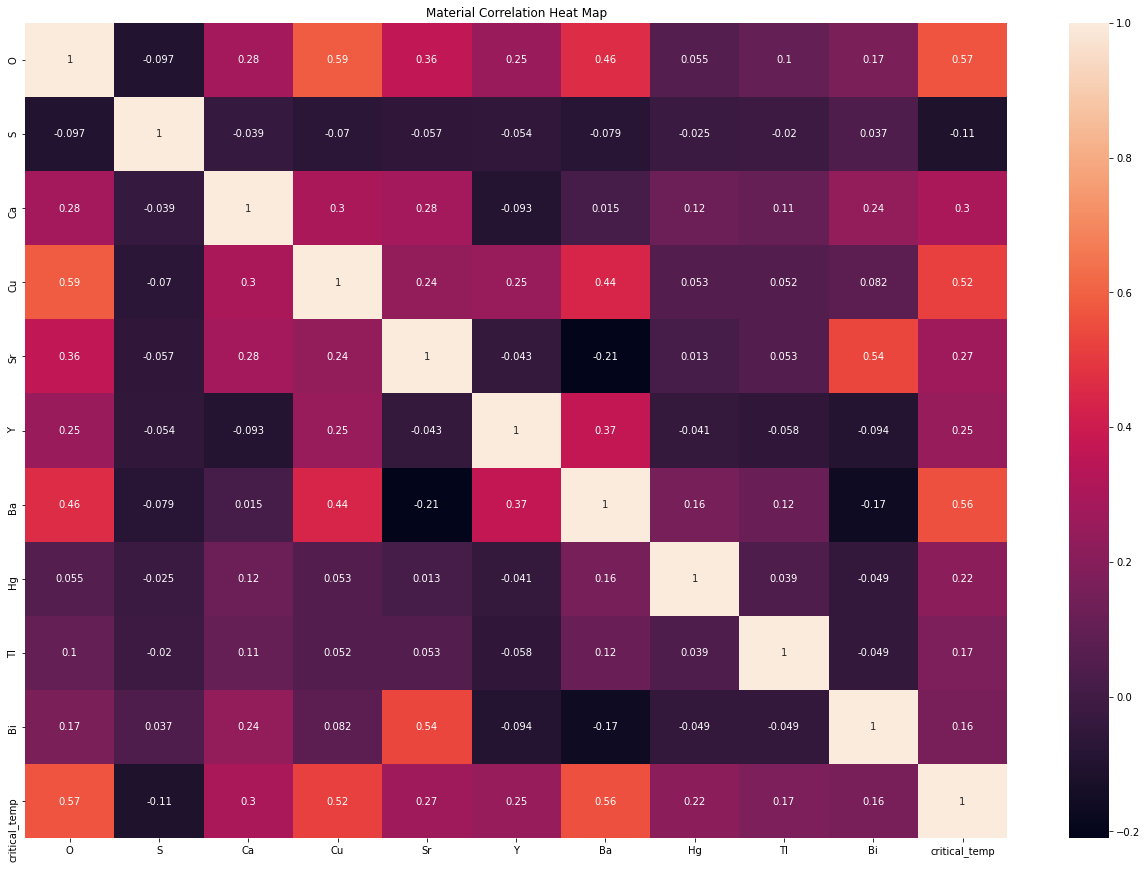

In [38]:
corr_material_matrix = df_material.corr()
corr_mat_index = corr_material_matrix[abs(corr_material_matrix['critical_temp']) > 0.1]['critical_temp'].index

fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(corr_material_matrix.loc[corr_mat_index, corr_mat_index], annot=True)
plt.title("Material Correlation Heat Map")

### EDA feature data <a id='eda-feature-data'/>

##### Distribution of Critical Temperature
Below critical temperature is right skewed. As such, we investigated log transforming it. However, the distribution produced by the log transform did not appear to be less skewed. Therefore, we decide to leave critical temperature untransformed.

Text(0.5, 1.0, 'original scale critical temperature distribution')

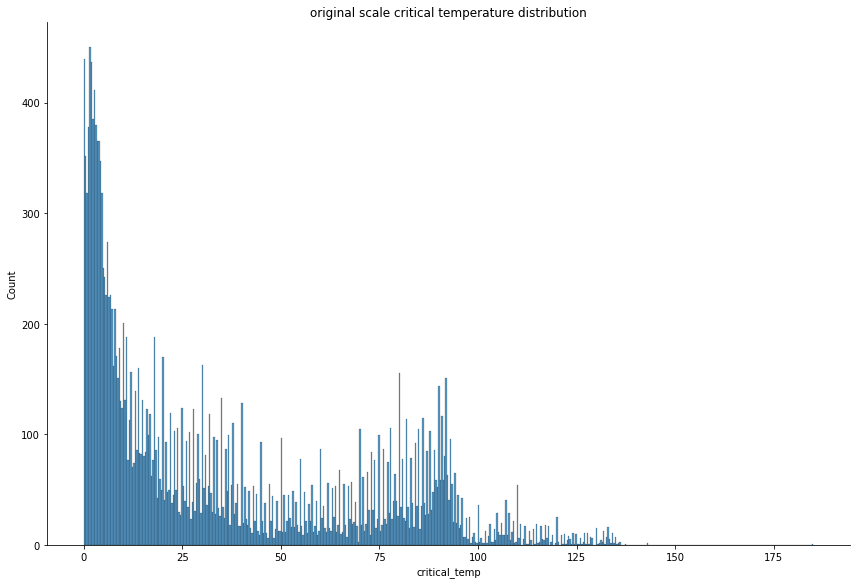

In [153]:
sns.displot(x='critical_temp', data=df_feature, bins=500, aspect=1.5, height=8)
plt.title("original scale critical temperature distribution")

Text(0.5, 1.0, 'log transformed critical temperature distribution')

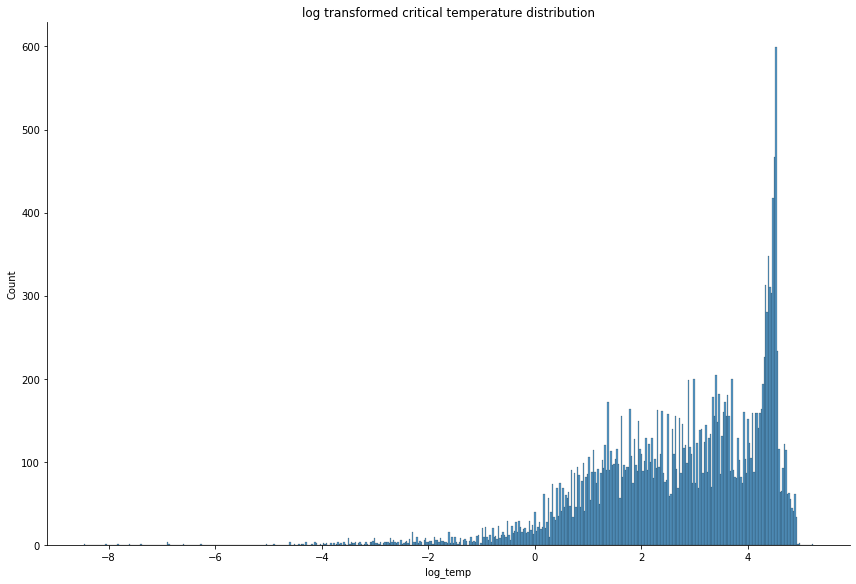

In [152]:
df_feature['log_temp'] = np.log(df_feature['critical_temp'])
sns.displot(x='log_temp', data=df_feature, bins=500, aspect=1.5, height=8)
plt.title("log transformed critical temperature distribution")

In [41]:
df_feature.drop(['log_temp'], axis=1, inplace=True)

##### Correlation of Features dataset

Since there are lots of features in the dataset, cross-correlation is evaluated first in order to identify potential important features that impact the prediction of the target variable, which is critical temperature and to identify multicolinearity.  There are two takeaways from the heatmap.
1. Among all the features, features that are highly correlated with critical temperature are displayed in the heatmap below. From the heatmap, 'Thermal Conductivity' related features are highly correlated with critical temperatures and 'Valence' related features are negatively correlated with critical temperatures.
2. Some features are highly correlated with each other, such as wtd_std_ThermalConductivity and std_ThermalConductivity. Again, this should be addressed by using regularization in our model (below). 

Text(0.5, 1.0, 'Property Feature Correlation Heat Map')

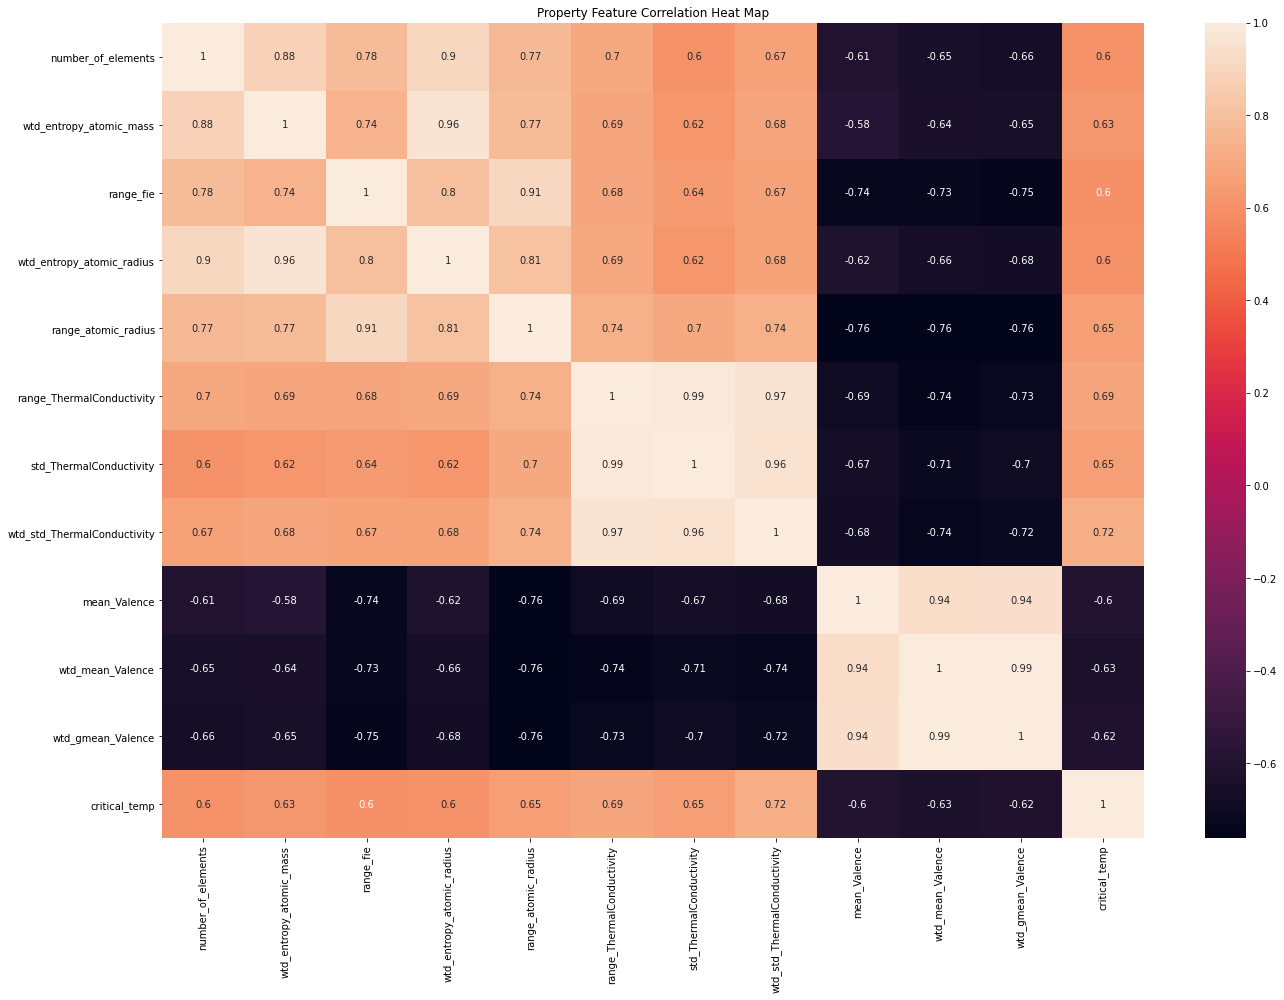

In [42]:
corr_properties_matrix = df_feature.corr()
corr_properties_index = corr_properties_matrix[abs(corr_properties_matrix['critical_temp']) > 0.6]['critical_temp'].index

fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(corr_properties_matrix.loc[corr_properties_index, corr_properties_index], annot=True)
plt.title("Property Feature Correlation Heat Map")

##### Positively Correlated Features vs Critical Temp
The graphical analysis below is made between two different thermal conductivity features and critical temperature. The first is 'thermal conductivity range' and the other is 'weighted standard thermal conductivity'. There is a trend for both that as values increases, the critical temperatures increases.
- For the range thermal conductivity, it shows that for the range between 200 to 400 there is small temperature but when it reaches around 400 the temperature dramatically increases. This may indicate some heteroskedascicity (variation in variance)
- For the weighted standard deviation of thermal conductivity, it shows that the critical temperature increases as values increases upto 200. When the standard deviation is greater than 200, the temperature dramatically decreases.

Text(0.5, 1.0, 'critical_temp vs range_ThermalConductivity')

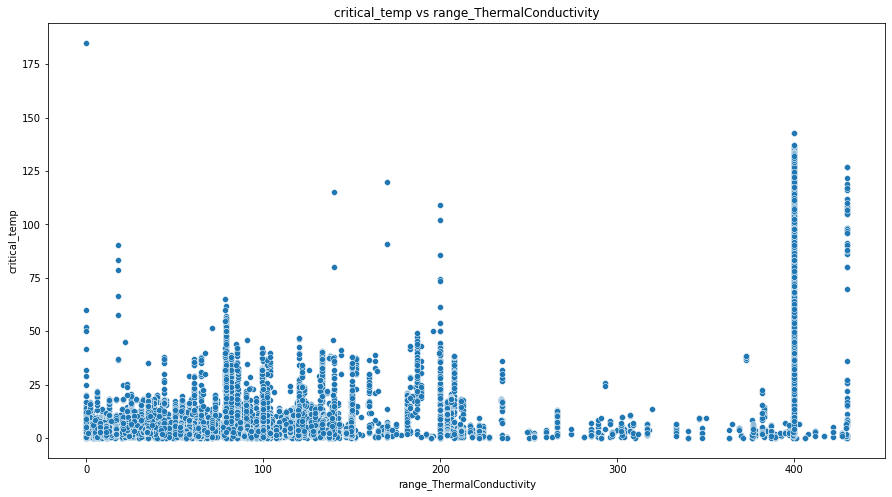

In [151]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='range_ThermalConductivity', y='critical_temp', data=full)
plt.title("critical_temp vs range_ThermalConductivity")

Text(0.5, 1.0, 'critical_temp vs wtd_std_ThermalConductivity')

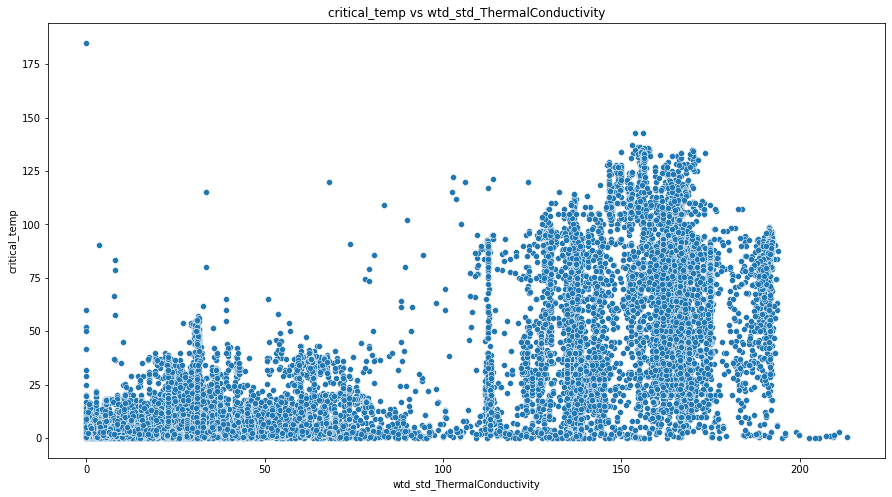

In [150]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='wtd_std_ThermalConductivity', y='critical_temp', data=full)
plt.title("critical_temp vs wtd_std_ThermalConductivity")

##### Negative Correlated Features vs Critical Temp
There are two features, mean_Valence and wtd_mean_Valence, that are negatively correlated with critical temperature. As the values increases, the critical temperature decreases. It shows that when mean valence is at 2, critical temperature seems to be at the hight points. This also indicates that these two features might be highly correlated as its graphs show similar results.

Text(0.5, 1.0, 'critical_temp vs mean_Valence')

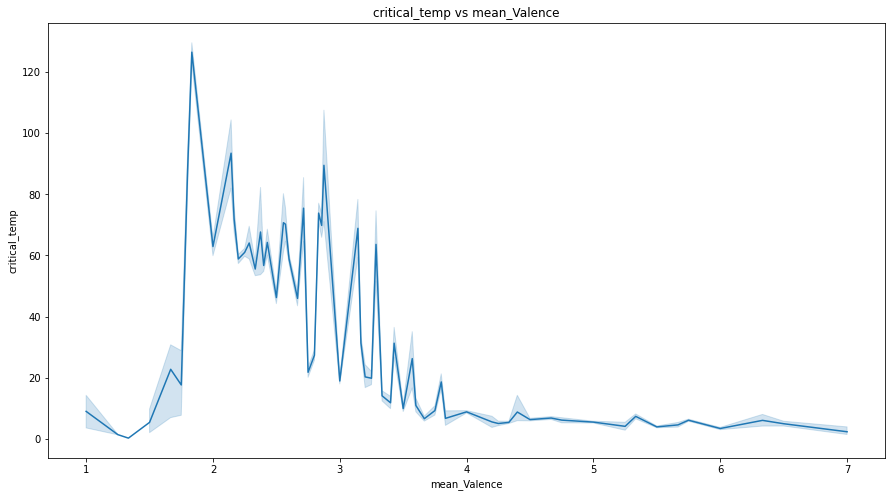

In [149]:
plt.figure(figsize=(15,8))
sns.lineplot(x='mean_Valence', y='critical_temp', data=full)
plt.title("critical_temp vs mean_Valence")

Text(0.5, 1.0, 'critical_temp vs wtd_mean_Valence')

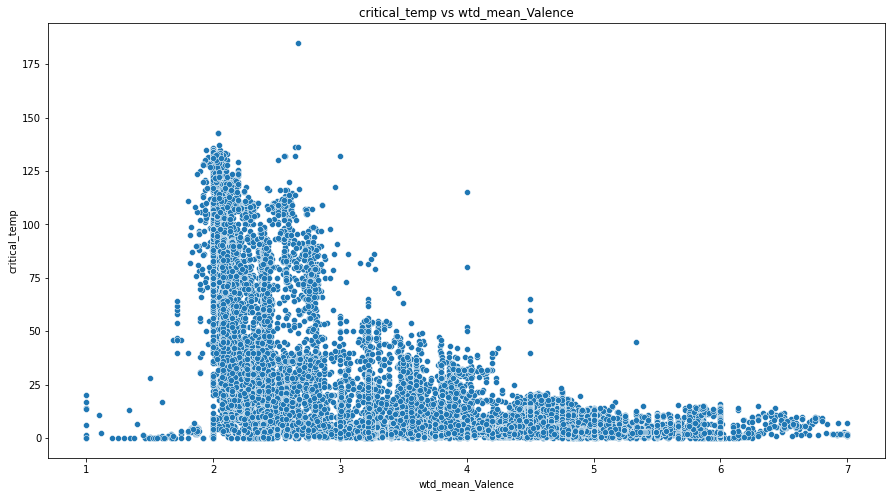

In [148]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='wtd_mean_Valence', y='critical_temp', data=full)
plt.title("critical_temp vs wtd_mean_Valence")

##### Highly correlated Features
In the properties of superconductor dataset, there are similar features that ones are weighted and ones are unweighted. As the below graphs show, they are also highly correlated. This may makes it hard to interpret the coefficients, and it reduces the power of the model to identify independent variables that are statistically significant. This indicates that it may require to alter the columsn or to use Ridge regression which reduce variances on the estimates.

Text(0.5, 1.0, 'wtd_mean_Valence vs mean_Valence')

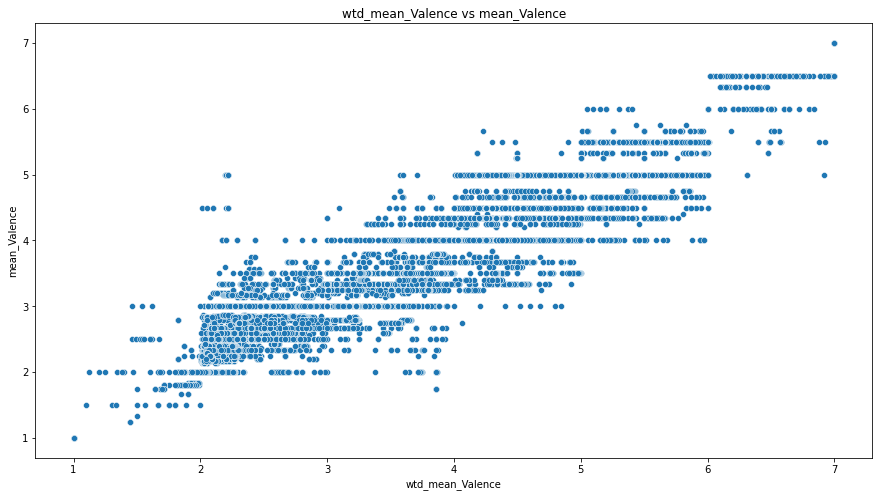

In [147]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='wtd_mean_Valence', y='mean_Valence', data=full)
plt.title("wtd_mean_Valence vs mean_Valence")

Text(0.5, 1.0, 'std_ThermalConductivity vs wtd_std_ThermalConductivity')

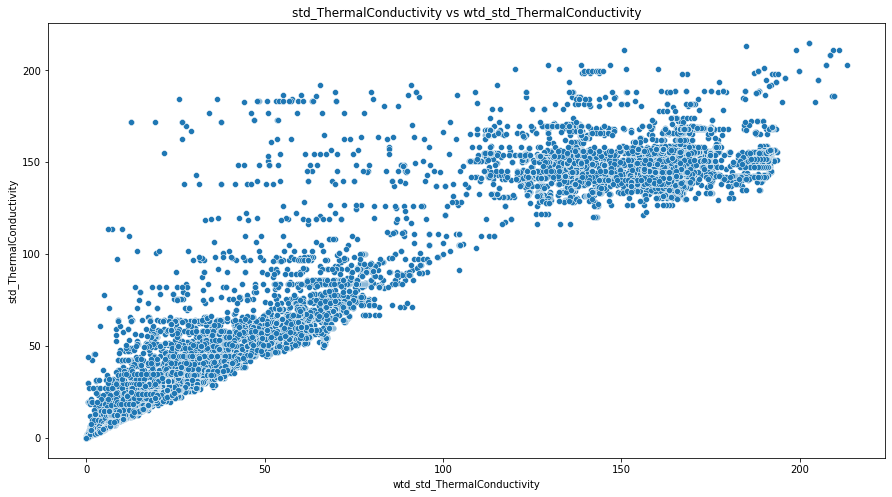

In [146]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='wtd_std_ThermalConductivity', y='std_ThermalConductivity', data=full)
plt.title("std_ThermalConductivity vs wtd_std_ThermalConductivity")

In [49]:
correlated_features = []
correlation_matrix = df_feature.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            
            correlated_features.append([correlation_matrix.columns[j],colname])
            
            
print('Highly correlated feature pairs are: \n')
for x in correlated_features:
    print(x)

Highly correlated feature pairs are: 

['wtd_mean_atomic_mass', 'wtd_gmean_atomic_mass']
['range_atomic_mass', 'std_atomic_mass']
['mean_fie', 'gmean_fie']
['wtd_mean_fie', 'wtd_gmean_fie']
['number_of_elements', 'entropy_fie']
['entropy_atomic_mass', 'entropy_fie']
['range_fie', 'std_fie']
['wtd_mean_atomic_radius', 'wtd_gmean_atomic_radius']
['number_of_elements', 'entropy_atomic_radius']
['entropy_atomic_mass', 'entropy_atomic_radius']
['entropy_fie', 'entropy_atomic_radius']
['wtd_entropy_atomic_mass', 'wtd_entropy_atomic_radius']
['range_atomic_radius', 'std_atomic_radius']
['range_atomic_radius', 'wtd_std_atomic_radius']
['gmean_Density', 'wtd_gmean_Density']
['range_Density', 'std_Density']
['range_ElectronAffinity', 'std_ElectronAffinity']
['wtd_mean_FusionHeat', 'wtd_gmean_FusionHeat']
['range_FusionHeat', 'std_FusionHeat']
['range_ThermalConductivity', 'std_ThermalConductivity']
['range_ThermalConductivity', 'wtd_std_ThermalConductivity']
['std_ThermalConductivity', 'wtd_std_

### Feature Selection <a id='feature-selection'/>

Below we can see that, first we build our test and trainins sets, to have only the columns that are appropriate. Then we can see that we use a StandardScaler which centers and scales all explanatory features to between 0 and 1. 

Note: Fitting the scaler for this this scaling is only perfomred on the training set to avoid data leakage. However, both test and training sets are transformed with the same scaler. 

In [57]:
X_train = train.drop(columns=['critical_temp'], inplace=False)
X_test = test.drop(columns=['critical_temp'], inplace=False)
y_train = train['critical_temp']
y_test = test['critical_temp']

Standardization of features through scaling:  Scaling and centering the the explanatory variables for our models will prevent uneven or skewed variances between variables from dominating the model erroneously. Further, normalization of our data will also ensure that feature selection and outlier detection is done without bias for features with a higher scale. As such, we normalize the data, we levarage z-scores normalization to determine if a material has extreme numbers from the norm. This will provide a generally better performing model, however these outlier should be observed by an additional expert to ensure no important insight in superconductors is lost in this process.

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_array = scaler.transform(X_train)
X_test_array = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

In [60]:
X_train_scaled.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,Other_Materials
14522,-0.071826,0.0,-0.096235,-0.041627,-0.127289,-0.089351,-0.085824,-0.787160,-0.11014,0.0,...,0.856907,0.751955,0.849761,0.111311,0.076204,0.772552,0.561471,0.798061,0.803671,0.992887
19662,-0.071826,0.0,-0.096235,-0.041627,-0.127289,-0.089351,-0.085824,1.281896,-0.11014,0.0,...,-0.664846,-0.335677,-0.702287,0.497754,0.880794,1.578515,-0.564005,1.469395,0.810430,-0.100217
12805,-0.071826,0.0,-0.096235,-0.041627,-0.127289,-0.089351,-0.085824,-0.787160,-0.11014,0.0,...,2.582621,2.753219,2.631148,-1.571469,-1.116863,-0.033410,0.739543,0.333030,0.672685,-0.318837
6055,-0.071826,0.0,-0.096235,-0.041627,-0.127289,-0.089351,-0.085824,-0.528528,-0.11014,0.0,...,-0.874467,-0.624029,-0.844478,0.937141,1.427704,1.578515,-0.900877,1.348388,-0.048875,-0.173090
18687,-0.071826,0.0,-0.096235,-0.041627,-0.127289,-0.089351,-0.085824,0.247368,-0.11014,0.0,...,-0.745731,-0.537933,-0.706942,0.676944,0.244169,-0.033410,-0.379458,-0.080801,-0.473087,-0.241591


##### Random Forest Feature Selection

Although we will use L1 and L2 regularization below, it also because useful to do a prelimary feature selection. To accomplish this we leverage Random Forest Regressor Feature Importance. 

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [10, 20, 30], 'max_features': [10, 25, 50]},
    {'bootstrap': [False], 'n_estimators': [5, 10, 30], 'max_features': [10, 30, 50]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [10, 25, 50],
                          'n_estimators': [10, 20, 30]},
                         {'bootstrap': [False], 'max_features': [10, 30, 50],
                          'n_estimators': [5, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

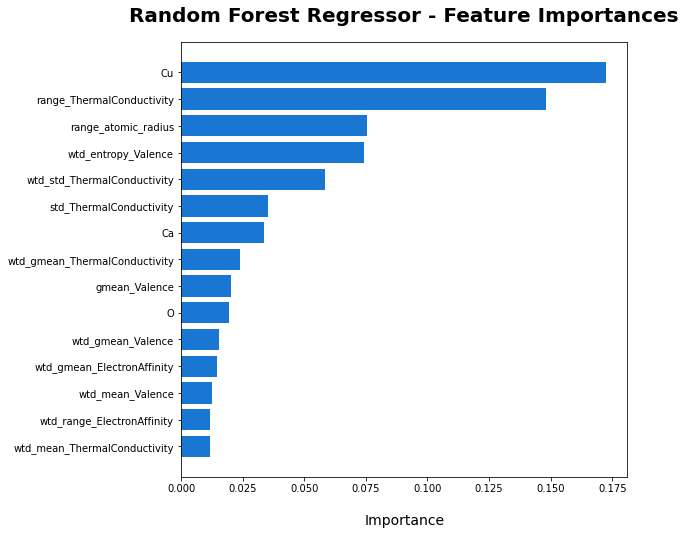

In [63]:
dset = pd.DataFrame()
dset['attr'] = X_train_scaled.columns
dset['importance'] = grid_search.best_estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=True)[len(dset)-15:]


plt.figure(figsize=(8, 8))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('Random Forest Regressor - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

We can see that the top features were Cu, wtd_mean_Valence, range_ThermalConductivity, range_atomic_radius, Ca, wtd_entropy_atomic_mass, wtd_std_ThermalConductivity, Ba etc.

Based on domain experience and the fact that we will be using regularization later, we choose to keep Oxygen as well. 

In [119]:
material_cols_to_remove = df_material.columns.difference(['O','Cu','Ba', 'Ca', 'Other_Materials']).tolist()
# feature_col_to_remove = ['std_Valence','entropy_ThermalConductivity','gmean_atomic_mass','gmean_fie','std_FusionHeat','mean_fie','mean_FusionHeat','range_FusionHeat', 'range_Valence']
all_cols_to_remove = material_cols_to_remove # + feature_col_to_remove

X_train = X_train.drop(all_cols_to_remove, axis=1, inplace=False, errors='ignore')
X_test = X_test.drop(all_cols_to_remove, axis=1, inplace=False, errors='ignore')

In [66]:
X_train.head()

,O,Ca,Cu,Ba,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,...,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,wtd_range_Valence,wtd_std_Valence,Other_Materials
14522,0.0,0.0,0.00,0.0,4,140.632075,101.089637,68.060305,1.240445,1.149647,...,59.050785,4.000000,4.157895,3.833659,4.038808,1.342126,1.083714,2.026316,1.039390,19.00
19662,8.0,0.0,2.00,0.0,5,70.406250,43.942361,31.911353,1.497519,1.579513,...,138.057362,3.000000,2.357143,2.701920,2.226835,1.494365,1.390502,0.928571,1.042466,4.00
12805,0.0,0.0,0.00,0.0,2,183.577440,184.103352,184.085254,0.693045,0.670134,...,4.409082,6.000000,6.200000,5.916080,6.118526,0.679193,0.628799,2.200000,0.979796,1.00
6055,1.0,3.0,4.00,0.0,6,76.638250,65.606294,56.078836,1.527282,1.495645,...,160.269780,2.666667,2.109091,2.401874,2.060831,1.667462,1.599039,0.600000,0.651508,3.00
18687,4.0,0.0,0.94,0.0,5,73.000813,55.743569,35.422382,1.446044,1.106466,...,134.749260,2.600000,2.261429,2.491462,2.221400,1.564957,1.147759,1.108571,0.458505,2.06


### Outliers <a id='outliers'/>

Here we see that there are definitely outliers, including out near 30 Standard Errors. This is probably one major reason for the obvious right skew. However, if we drop strong outliers this presents controversy in the our analysis. Without further domain knowledge, we feel, at this time, it is the best course of action to leave outliers in the dataset.

Text(0.5, 1.0, 'Distribution of Z-Normalized Critical Temperature')

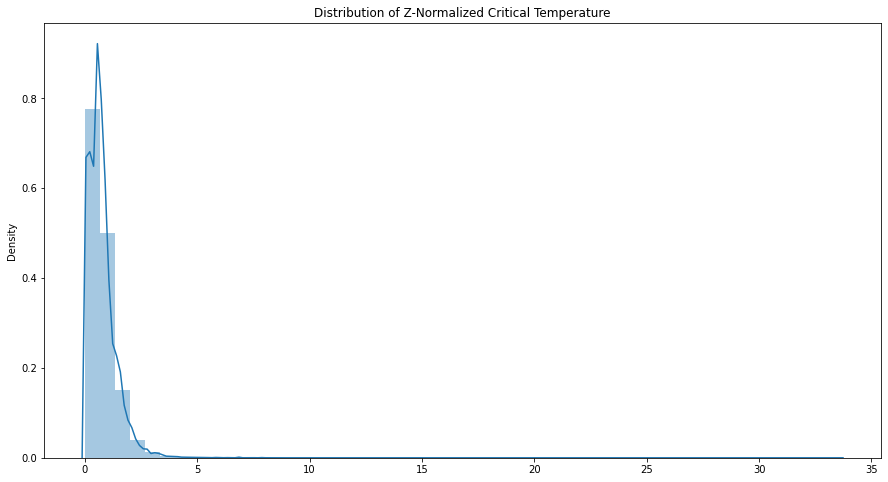

In [143]:
from scipy import stats

z_scores = stats.zscore(X_train)
abs_z_scores = np.abs(z_scores)
plt.figure(figsize=(15,8))
sns.distplot(abs_z_scores)
plt.title("Distribution of Z-Normalized Critical Temperature")

In [ ]:
abs_z_scores.drop(abs_z_scores[(abs_z_scores > 5).any(1)].index, axis=0,inplace=True)
abs_z_scores.index

# Model Preparation <a id='model-preparation'/>

In order to build the best model to predict critical temperature the model must be accurate, but also easy to understand and explainable. To accomplish this goal linear regression with L1 and L2 regularization will be explored as potential best choices for this problem. Linear regression can be very powerful and highly interpretable. Additionally, including L1 and/or L2 regularization helps prevent overfitting, so our model should generalize well. The following were leveraged in our model building. 

1. Test/Train split: in order to evaluate our models, we held out a 30% test set and used a 70% training set for model training. The code that runs this is above, prior to any feature engineering or EDA. We did our best to avoid any data leakage.  

2. Mean Absolute Percentage Error. This is a useful metric because, unlike Mean Absolute Error, errors for small values have the same impact on model training as errors for large values. It should be noted that MAPE is most useful for values that can only be positive and 'Critical Temperature' can only be positive. 


3. Cross Validation with MAPE is also used to help mitigate overfitting. Specifically, 5-Fold Cross Validation is utilized for sampling.


The purpose of these model preparation steps is to increase the performance of the model scores (MAPE) for this particular dataset, while maintaining the performance on future data.

# Model Building <a id='model-building'/>

When building the L1 and L2 models, the metric used to determine which model performed the best was the Mean Absolute Percent Error (MAPE). To maximize the usage of the full dataset, 5-Fold Cross Validation is utilized for sampling. To tune both the L1 and L2 models, varying alpha's were used to pick the best of the choices. With the usage of alpha tuning and cross validation the best L1 and L2 model can be built.

For the L1 model, the best result was a MAPE of ~9.42%  with an alpha of 0.01. For the L2 model the best result was a MAPE of 7.977 with an alpha of 18. While the L1 model performed better, the L2 model performance was incredible close to the L1 model. While both models would be valid choices for this problem, L2 as the added benefit of better handling of multicollinearity in the dataset.

##### Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

ln_model = LinearRegression()
ln_model.fit(X_train, y_train)
abs(cross_val_score(ln_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')).mean()

9.281083845572754

#### L1 - Lasso

In [78]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

l1_params = {'alpha':[0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5], 'random_state': [42]}
# l2_params = {'alpha':np.linspace(5,20,4)}

l1_grid_search = GridSearchCV(Lasso(), l1_params, cv=5, scoring='neg_mean_absolute_percentage_error', 
                           return_train_score=True, n_jobs=-1)
l1_grid_search.fit(X_train, y_train)

# Yuck, sorry about the warnings here. we tried disabling them. 

/Users/riccoferraro/Documents/SMU/ML1/MachineLearningOne/ricco_env_x/ricco_env_x/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1763691.690048118, tolerance: 1387.2763207404732
  model = cd_fast.enet_coordinate_descent(
/Users/riccoferraro/Documents/SMU/ML1/MachineLearningOne/ricco_env_x/ricco_env_x/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1783224.8104362446, tolerance: 1384.1477007256033
  model = cd_fast.enet_coordinate_descent(
/Users/riccoferraro/Documents/SMU/ML1/MachineLearningOne/ricco_env_x/ricco_env_x/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01,
                                   0.05, 0.1, 0.5],
                         'random_state': [42]},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

As can be seen the alpha for the best model according to cross validation is .01. 

As can be seen, according to 5-fold cross validation on a gridearch with a range spaning orders of magnitude, the best alpha is .01 for our test data. This essentially "turns off" or greatly diminishes the effect of lasso regression (L1). Interestingly, we can still see that some of the variables, like 'wtd_gmean_fie' or 'gmean_Valence' are still zeroed out, such a low alpha value. 

We choose Lasso regression as our explainable model, if the goal is inference. More on this below. 

Lasso (with alpha =.01) produces a Mean Absolute Percentage Error of 9.422480763635676%

Ridge (with alpha=10)

In this case, Lasso Regression effectively zeros out:

'range_Density', 'wtd_std_Density', 'wtd_mean_Density', 'wtd_range_Density', 'gmean_Density', 'wtd_mean_Valence', 'wtd_entropy_atomic_mass', 'entropy_Valence', 'entropy_Density', and 'O'

In [80]:
l1_grid_search.best_estimator_

Lasso(alpha=0.01, random_state=42)

In [92]:
mean_cross_val_score = abs(cross_val_score(l1_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')).mean()
print(f"cross-validation score for l1 regression best fit was: {mean_cross_val_score}%")

cross-validation score for l2 regression best fit was: 9.422480763635676%


In [93]:
sorted_variables = sorted(zip(abs(l1_grid_search.best_estimator_.coef_), X_train.columns.values.tolist()), reverse=True)
sorted_variables

[(22.304670410575206, 'wtd_entropy_FusionHeat'),
 (20.68102261361708, 'wtd_entropy_fie'),
 (20.237467526247638, 'wtd_entropy_Valence'),
 (16.057517158001865, 'wtd_entropy_ElectronAffinity'),
 (11.478064985730883, 'entropy_atomic_mass'),
 (9.091770737406486, 'wtd_std_Valence'),
 (8.619214904034678, 'wtd_entropy_ThermalConductivity'),
 (7.215436934422275, 'wtd_entropy_Density'),
 (6.178138663248773, 'mean_Valence'),
 (5.958302953956535, 'Ba'),
 (5.901054880499588, 'gmean_Valence'),
 (5.889408353520503, 'entropy_atomic_radius'),
 (4.534293994437204, 'wtd_entropy_atomic_radius'),
 (4.117240321025121, 'entropy_ElectronAffinity'),
 (2.1328076973551617, 'entropy_fie'),
 (1.3307043691355156, 'wtd_range_Valence'),
 (1.2075536143646515, 'Ca'),
 (1.1930584738974244, 'std_ElectronAffinity'),
 (1.0503402327383522, 'gmean_atomic_radius'),
 (0.937475011355104, 'entropy_FusionHeat'),
 (0.7986945272325061, 'std_atomic_radius'),
 (0.7732414131897846, 'mean_atomic_radius'),
 (0.7025251408247495, 'wtd_gme

#### L2 - Ridge

Due to linear regression performing the best, our gridsearch on alpha for ridge regression prefers lower values to approximate least squares regression. However, armed with domain knowledge as well as wanting to keep our model parsimonious and explainable, we prevent alpha from going lower than .01. It is possible that our previous feature selection and reduction with random forest (in the EDA section) has already selected the most important variables. 

In [121]:
from sklearn.linear_model import Ridge

l2_params = {'alpha':[.01, .1, 1, 5, 10, 15], 'random_state': [42]}

l2_grid_search = GridSearchCV(Ridge(), l2_params, cv=5, scoring='neg_mean_absolute_percentage_error', 
                           return_train_score=True, n_jobs=-1)
l2_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 15],
                         'random_state': [42]},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [122]:
l2_grid_search.best_estimator_

Ridge(alpha=0.01, random_state=42)

In [123]:
abs(cross_val_score(l2_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')).mean()
print(f"cross-validation score for l2 regression best fit was: {mean_cross_val_score}%")

cross-validation score for l2 regression best fit was: 9.422480763635676%


In [ ]:
prediction =  l2_grid_search.best_estimator_.predict(X_test)
mean_absolute_percentage_error(y_test, prediction)

<AxesSubplot:title={'center':'Predicted Vs actual Critical Temperature'}, ylabel='critical_temp'>

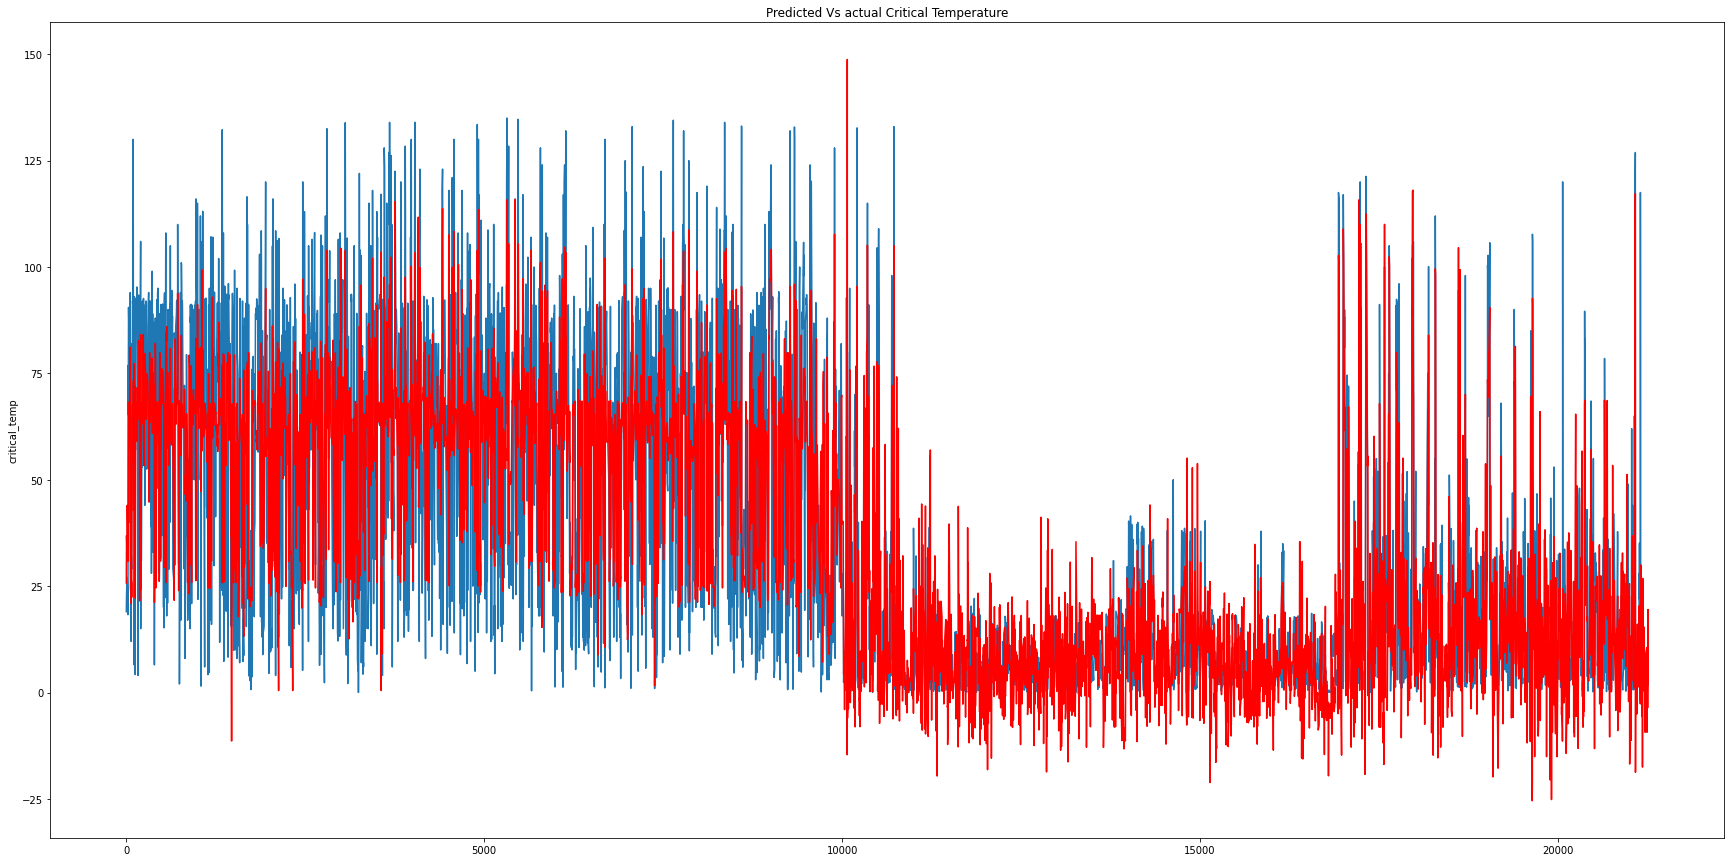

In [154]:
fig, axes = plt.subplots(1,1, figsize=(30,15))
axes.set_title("Predicted Vs actual Critical Temperature")
sns.lineplot(x=X_test.index, y=y_test, ax=axes)
sns.lineplot(x=y_test.index, y=prediction, ax=axes, color="red")

In [128]:
from sklearn.metrics import mean_absolute_percentage_error

prediction =  l1_grid_search.best_estimator_.predict(X_test)
mape = mean_absolute_percentage_error(y_test, prediction)
print(f"test mean absolute percentage error for l1 was: {mape}%")

test mean absolute percentage error for l1 was: 22.77679966811371%


In [127]:
prediction =  l2_grid_search.best_estimator_.predict(X_test)
mape = mean_absolute_percentage_error(y_test, prediction)
print(f"test mean absolute percentage error for l2 was: {mape}%")

test mean absolute percentage error for l2 was: 21.559111473113614%


As can be seen above, both L1 and L2 models appear to have heavy overfitting. This may be because of outliers existing in our test set, or further hyperparameters needing to be explored. It should be noted that the test Mean Absolute Percentage Error was more than 2X the training error (even with cross validation). 

### Model Interpretability & Explainability

Below we can see that both L1 (Lasso) and L2 (Ridge) feature importance is similar with properties like `wtd_entropy_FusionHeat` and `wtd_entropy_fie` toping the list of most important factors.

If the goal is purely prediction and inference or interpretability is a "nice to have" then we recommend our Ridge regression model. There is still a decent amount of interpretability with its coefficients and the data being scaled. We can see from the variable importance and plot below that `wtd_entropy_FusionHeat`, `wtd_entropy_fie`, and `wtd_entropy_Valence` are more than 3 times more influential than `Ba` and `mean_valence`. This conclusion is reached, by running both L1 and L2 regressions on scaled data and analyzing the feature coefficients.  

In [135]:
print(".......Variable Importance L1 Regression......")
sorted(zip(abs(l1_grid_search.best_estimator_.coef_), X_train.columns.values.tolist()), reverse=True)[:10]

.......Variable Importance L1 Regression......


[(22.304670410575206, 'wtd_entropy_FusionHeat'),
 (20.68102261361708, 'wtd_entropy_fie'),
 (20.237467526247638, 'wtd_entropy_Valence'),
 (16.057517158001865, 'wtd_entropy_ElectronAffinity'),
 (11.478064985730883, 'entropy_atomic_mass'),
 (9.091770737406486, 'wtd_std_Valence'),
 (8.619214904034678, 'wtd_entropy_ThermalConductivity'),
 (7.215436934422275, 'wtd_entropy_Density'),
 (6.178138663248773, 'mean_Valence'),
 (5.958302953956535, 'Ba')]

In [136]:
print(".......Variable Importance L2 Regression......")
sorted(zip(abs(l2_grid_search.best_estimator_.coef_), X_train.columns.values.tolist()), reverse=True)[:10]

.......Variable Importance L2 Regression......


[(72.56101250966903, 'entropy_atomic_radius'),
 (62.73567395735196, 'wtd_entropy_Valence'),
 (59.54334579669109, 'entropy_fie'),
 (49.6981767551981, 'wtd_entropy_fie'),
 (29.33637487515164, 'entropy_atomic_mass'),
 (27.64316865987464, 'wtd_mean_Valence'),
 (25.826486770255453, 'wtd_entropy_FusionHeat'),
 (24.561647295554152, 'wtd_gmean_Valence'),
 (24.082367461073535, 'wtd_entropy_atomic_radius'),
 (21.886280998420155, 'wtd_entropy_ElectronAffinity')]

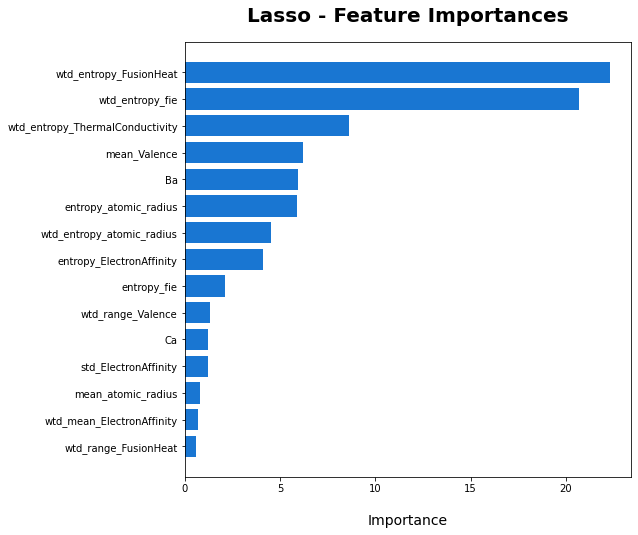

In [120]:
dset = pd.DataFrame()
dset['attr'] = X_train.columns
dset['importance'] = l1_grid_search.best_estimator_.coef_

dset = dset.sort_values(by='importance', ascending=True)[len(dset)-15:]


plt.figure(figsize=(8, 8))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('Lasso - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

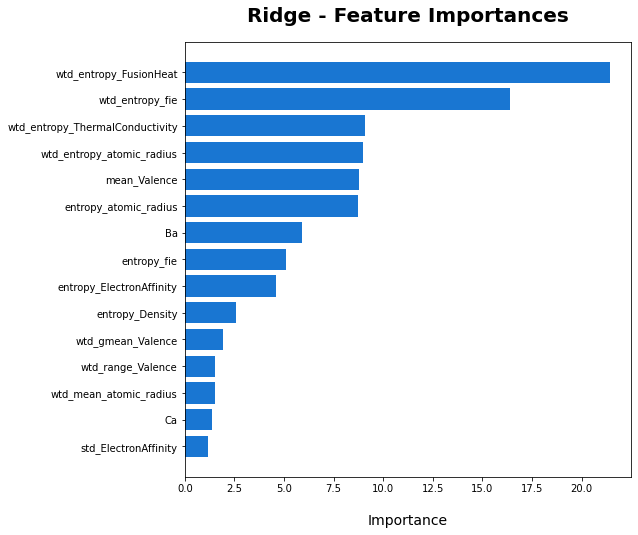

In [97]:
dset = pd.DataFrame()
dset['attr'] = X_train.columns
dset['importance'] = l2_grid_search.best_estimator_.coef_

dset = dset.sort_values(by='importance', ascending=True)[len(dset)-15:]


plt.figure(figsize=(8, 8))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('Ridge - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

# Conclusion <a id='conclusion'/>

When determining critical temperature the best model to use, according to both validaiton and test mean absolute percentage error is L2. It outperforms L1 regression very slightly. The feature reduction this model provides for this dataset is invaluable. To maximize the results this model, data cleaning and normalized will be vital. When removing outliers it is important to evaluate this independently to prevent important information that might be loss in these observations.

However, if the goal is inference, the model we recommend is the L1 Regularization (Lasso). This is because it fully zeros out parameters which do not contribute well in predicting Critical Temperature. 

It should also be noted that both our L1 and L2 models appear to overfit somewhat strongly. This may be because of the presence of outliers in our test data, or hyperparameter tuning which could still be accomplished to improve our models. This would be a future goal in critical temperature analysis. 

Other approaches worth exploring might include bringing in more data from other datasets, trying some neural network based approaches. Further, clustering could be used for feature engineering. 

Weighted Entropy Fusion Heat and Weighted Entropy Fie are the most important factors in determining critical temperature for different materials. The presence of specific elements, and their releative abundance, are NOT as important as other features of materials. This makes sense, as material makeup isn't just about atomic composition, but instead about the nature of chemical bonds, and the crystalized structure of those elements among other things. 

While an alternative model that is more powerful could be used on this dataset, linear regression is powerful and easy to understand. This basic, but powerful model will help scientist to make more education decisions on what to look for when making future superconductors.